# JPEG Compression

In [154]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import dct, idct
import math

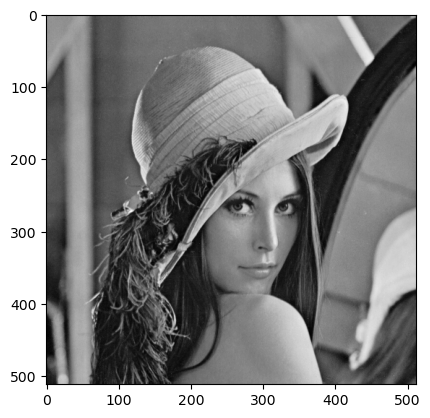

In [171]:
image = cv2.imread('/Users/rajeshr/Desktop/DIPLab5/lena_gray.bmp', cv2.IMREAD_GRAYSCALE)
row, col = image.shape
plt.imshow(image, cmap='gray')
plt.show()

In [156]:
blocks = []
for i in range(0, row, 8):
    for j in range(0, col, 8):
        blocks.append(np.array(image[i:i+8, j:j+8]))
        
print(blocks[0])

[[160 160 160 159 161 156 161 159]
 [161 160 159 159 161 155 161 159]
 [160 161 160 158 161 156 162 159]
 [161 161 159 159 161 156 161 159]
 [160 160 160 159 161 156 162 159]
 [162 162 157 154 159 159 157 159]
 [159 159 162 157 159 161 158 155]
 [157 157 155 155 157 158 155 157]]


In [157]:
subt_blocks = [block-128 for block in blocks]
print(sub_blocks[0])

[[32 32 32 31 33 28 33 31]
 [33 32 31 31 33 27 33 31]
 [32 33 32 30 33 28 34 31]
 [33 33 31 31 33 28 33 31]
 [32 32 32 31 33 28 34 31]
 [34 34 29 26 31 31 29 31]
 [31 31 34 29 31 33 30 27]
 [29 29 27 27 29 30 27 29]]


In [181]:
dct_subt_blocks = [dct(subt_block).astype(np.float32) for subt_block in subt_blocks]
print(dct_subt_blocks[0])

[[ 5.0400000e+02  3.9628320e+00  1.9790753e+00 -3.5708814e+00
   2.8284271e+00  1.3075552e+00 -1.0004162e+01  1.2076220e+01]
 [ 5.0200000e+02  5.9244022e+00  5.3575683e+00 -1.9079422e+00
   7.0710678e+00  2.4186957e+00 -1.2934314e+01  1.2466400e+01]
 [ 5.0600000e+02  3.5726514e+00  5.3575683e+00 -2.4597409e+00
  -1.4142135e+00 -3.5538408e-01 -1.2934314e+01  1.4037789e+01]
 [ 5.0600000e+02  6.4762011e+00  5.3575683e+00 -3.3655229e-01
   4.2426405e+00  6.6944413e-02 -1.2934314e+01  9.6923199e+00]
 [ 5.0600000e+02  2.2998927e+00  2.7444422e+00 -3.1807008e+00
   1.4142135e+00  3.2691257e+00 -1.1851921e+01  1.3187360e+01]
 [ 4.9000000e+02  1.0026223e+01  1.7078173e+01  1.2516758e+01
  -1.4142135e+00 -1.5569489e+01  5.7965773e-01  2.0968139e+00]
 [ 4.9200000e+02  9.8400011e+00 -8.2877197e+00  6.5222864e+00
  -1.4142136e+01 -4.5270652e-01  9.5558205e+00  6.0356627e+00]
 [ 4.5400000e+02 -7.8790426e-01  2.9301512e+00  7.3266315e+00
   1.4142135e+00 -8.4195614e+00  3.3784928e+00 -3.2879574e+00]]

In [159]:
QuantizationMatrix = np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,130,99]])

print(QuantizationMatrix)

[[ 16  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56  68 109 103  77]
 [ 24  35  55  64  81 104 113  92]
 [ 49  64  78  87 103 121 120 101]
 [ 72  92  95  98 112 100 130  99]]


In [160]:
dct_Quantized = []
for i in dct_subt_blocks:
    dct_Quantized.append(i/QuantizationMatrix)

print(dct_Quantized[0])

[[ 3.15000000e+01  3.60257452e-01  1.97907531e-01 -2.23180085e-01
   1.17851128e-01  3.26888800e-02 -1.96160036e-01  1.97970812e-01]
 [ 4.18333333e+01  4.93700186e-01  3.82683447e-01 -1.00418009e-01
   2.71964147e-01  4.17016498e-02 -2.15571896e-01  2.26661821e-01]
 [ 3.61428571e+01  2.74819337e-01  3.34848017e-01 -1.02489203e-01
  -3.53553385e-02 -6.23480845e-03 -1.87453823e-01  2.50674810e-01]
 [ 3.61428571e+01  3.80953003e-01  2.43525830e-01 -1.16052515e-02
   8.31890293e-02  7.69476010e-04 -1.61678922e-01  1.56327740e-01]
 [ 2.81111111e+01  1.04540576e-01  7.41741142e-02 -5.67982282e-02
   2.07972579e-02  2.99919789e-02 -1.15067195e-01  1.71264413e-01]
 [ 2.04166667e+01  2.86463520e-01  3.10512231e-01  1.95574343e-01
  -1.74594264e-02 -1.49706620e-01  5.12971446e-03  2.27914556e-02]
 [ 1.00408163e+01  1.53750017e-01 -1.06252817e-01  7.49688094e-02
  -1.37302288e-01 -3.74137616e-03  7.96318372e-02  5.97590361e-02]
 [ 6.30555556e+00 -8.56417677e-03  3.08436971e-02  7.47615464e-02
   

In [161]:
r_dct_Quantized = [np.around(block).astype(np.int32) for block in dct_Quantized]
print(r_dct_Quantized[0])

[[32  0  0  0  0  0  0  0]
 [42  0  0  0  0  0  0  0]
 [36  0  0  0  0  0  0  0]
 [36  0  0  0  0  0  0  0]
 [28  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0]]


In [162]:
dct_deQuantized = []
for i in r_dct_Quantized:
    dct_deQuantized.append(i*QuantizationMatrix)

print(dct_deQuantized[0])

[[512   0   0   0   0   0   0   0]
 [504   0   0   0   0   0   0   0]
 [504   0   0   0   0   0   0   0]
 [504   0   0   0   0   0   0   0]
 [504   0   0   0   0   0   0   0]
 [480   0   0   0   0   0   0   0]
 [490   0   0   0   0   0   0   0]
 [432   0   0   0   0   0   0   0]]


In [163]:
idct_blocks = [idct(block) for block in dct_deQuantized]
print(idct_blocks[0])

[[512. 512. 512. 512. 512. 512. 512. 512.]
 [504. 504. 504. 504. 504. 504. 504. 504.]
 [504. 504. 504. 504. 504. 504. 504. 504.]
 [504. 504. 504. 504. 504. 504. 504. 504.]
 [504. 504. 504. 504. 504. 504. 504. 504.]
 [480. 480. 480. 480. 480. 480. 480. 480.]
 [490. 490. 490. 490. 490. 490. 490. 490.]
 [432. 432. 432. 432. 432. 432. 432. 432.]]


In [164]:
added_blocks = [block+128 for block in idct_blocks]
print(added_blocks[0])

[[640. 640. 640. 640. 640. 640. 640. 640.]
 [632. 632. 632. 632. 632. 632. 632. 632.]
 [632. 632. 632. 632. 632. 632. 632. 632.]
 [632. 632. 632. 632. 632. 632. 632. 632.]
 [632. 632. 632. 632. 632. 632. 632. 632.]
 [608. 608. 608. 608. 608. 608. 608. 608.]
 [618. 618. 618. 618. 618. 618. 618. 618.]
 [560. 560. 560. 560. 560. 560. 560. 560.]]


In [182]:
result_image = added_blocks.reshape(row, col)
print(result_image)

[[ 640.          640.          640.         ... 4293.88579892
  4027.59847224 4003.28454296]
 [3765.49164645 3800.90213144 3754.98011956 ... 3984.04416142
  4032.86870417  108.44300356]
 [ 197.57727617  194.29233147  188.22254513 ...  200.
   200.          200.        ]
 ...
 [ 505.80062896  490.72267435  472.24757245 ... 1336.54532082
   395.33007619 4062.58561411]
 [3384.83827359 3466.82892037 3523.76166878 ... 3409.77507712
  3359.00959134 3331.53550841]
 [3716.55228294 3735.15989255 3679.66872216 ... 3902.22492288
  3952.99040866 3980.46449159]]


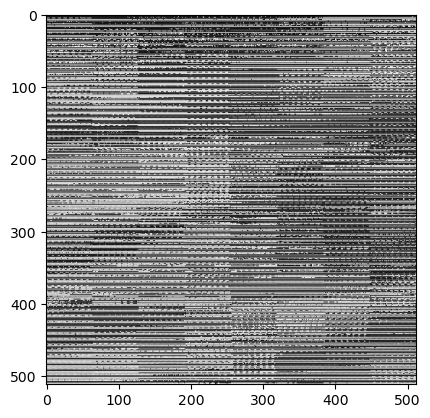

In [179]:
plt.imshow(result_image, cmap='gray')
plt.show()

### Other Questions

Apply other Quant matrix and calc PSNR

Read color image and apply Y, CB, CR

perform compression

For gray scale image perform zigzag and entropy

In [183]:
output = []
for i in range(0, row, 8):
    for j in range(0, col, 8):
        #output.append(np.array(added_blocks[i:i+8, j:j+8]))
        pass
        
        
print(output[0])

IndexError: list index out of range

In [219]:
matrix = np.arange(36).reshape(6, 6)
print(matrix)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]


In [223]:
chunk = []
for i in range(0, 6, 2):
    for j in range(0, 6, 2):
        chunk.append(np.array(matrix[i:i+2, j:j+2]))

print(chunk)

[array([[0, 1],
       [6, 7]]), array([[2, 3],
       [8, 9]]), array([[ 4,  5],
       [10, 11]]), array([[12, 13],
       [18, 19]]), array([[14, 15],
       [20, 21]]), array([[16, 17],
       [22, 23]]), array([[24, 25],
       [30, 31]]), array([[26, 27],
       [32, 33]]), array([[28, 29],
       [34, 35]])]


In [225]:
hout = []
for i in range(0, len(chunk), 2):
    try:
        hout.append(np.column_stack([chunk[i], chunk[i+1]]))
    except:
        pass
    
print(hout, len(hout))

out = []
for i in range(0, len(hout), 2):
    try:
        out.append(np.vstack([hout[i], hout[i+1]]))
    except:
        pass
    
print(out)

[array([[0, 1, 2, 3],
       [6, 7, 8, 9]]), array([[ 4,  5, 12, 13],
       [10, 11, 18, 19]]), array([[14, 15, 16, 17],
       [20, 21, 22, 23]]), array([[24, 25, 26, 27],
       [30, 31, 32, 33]])] 4
[array([[ 0,  1,  2,  3],
       [ 6,  7,  8,  9],
       [ 4,  5, 12, 13],
       [10, 11, 18, 19]]), array([[14, 15, 16, 17],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [30, 31, 32, 33]])]


In [224]:
hout = []
for i in range(0, len(chunk), 2):
    hout.append(np.column_stack([chunk[i], chunk[i+1]]))
    
print(hout, len(hout))

out = []
for i in range(0, len(hout), 2):
    try:
        out.append(np.vstack([hout[i], hout[i+1]]))
    except:
        pass
    
print(out)

IndexError: list index out of range

In [217]:
Hstacked = []
for i in range(0, len(added_blocks), 8):
    Hstacked.append(np.column_stack([added_blocks[i], added_blocks[i+1]]))
    

In [255]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import dct, idct
import math

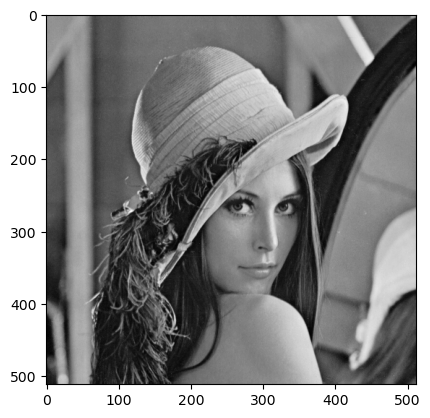

In [256]:
image = cv2.imread('/Users/rajeshr/Desktop/DIPLab5/lena_gray.bmp', cv2.IMREAD_GRAYSCALE)
row, col = image.shape
plt.imshow(image, cmap='gray')
plt.show()

In [266]:
blocks = []
dct_image = np.zeros(row*col).reshape(row, col)
Quantized_image = np.zeros(row*col).reshape(row, col)
DeQuantized_image = np.zeros(row*col).reshape(row, col)
idct_image = np.zeros(row*col).reshape(row, col)
compressed_image = np.zeros(row*col).reshape(row, col)


for i in range(0, row, 8):
    for j in range(0, col, 8):
        image[i:i+8, j:j+8] = image[i:i+8, j:j+8]-128
        dct_image[i:i+8, j:j+8] = dct(image[i:i+8, j:j+8]).astype(np.float32)
        Quantized_image[i:i+8, j:j+8] = np.around(dct_image[i:i+8, j:j+8]/QuantizationMatrix).astype(np.int32)
        DeQuantized_image[i:i+8, j:j+8] = Quantized_image[i:i+8, j:j+8]*QuantizationMatrix
        idct_image[i:i+8, j:j+8] = idct(DeQuantized_image[i:i+8, j:j+8])
        compressed_image[i:i+8, j:j+8] = idct_image[i:i+8, j:j+8]+128

        
print(dct_image.shape)
print(len(compressed_image[0]))

(512, 512)
512


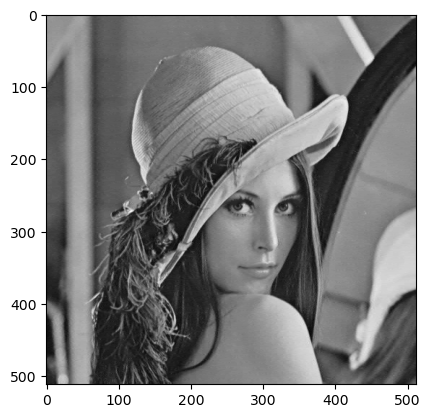

In [270]:
plt.imshow(compressed_image, cmap='gray')
plt.show()